<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
GDX full year STES data upload
</p>

In [15]:
#import gdxcc
import gdxpds
import pandas as pd
import numpy as np
import itertools


#Module that provides a portable way of using operating system dependent functionality
import os

from itertools import permutations, repeat

#Module to interact with the Notebook environment 
#https://ipywidgets.readthedocs.io/en/stable/
import ipywidgets as widgets

#Module for character encoding auto-detection 
#https://chardet.readthedocs.io/en/latest/index.html
import chardet 

#Plotting modules
import matplotlib
from matplotlib import pyplot as plt
#Allows plots to be shown on the Notebook
%matplotlib inline 
#%matplotlib notebook


#Data visualization module based on matplotlib
#https://seaborn.pydata.org/
import seaborn as sns

#Cross-platform colored terminal text 
#https://pypi.org/project/colorama/
from colorama import Fore
from colorama import Style

from pandas.io.parsers import ParserError

from itertools import product

In [16]:
dir_source = 'C:/Users/xigeby65/switchdrive/SwissStore/Model/Results/plots_data'
dir_parsed = 'C:/Users/xigeby65/switchdrive/SwissStore/Model/Results/plots'

**Choosing dictionary and main access key**

In [17]:
#data_scen_list =['base_data_t48','stes_data_t48','base_data_t8760','stes_data_t8760','stes_1223552_100071_t8760','base_1223552_100071_t8760']
data_scen_list = os.listdir(dir_source)

In [18]:
build_typ_widget = widgets.Dropdown(
    options = ['SFH','MFH'],
    description = 'build_typ ',
    disabled = False)
display(build_typ_widget)

Dropdown(description='build_typ ', options=('SFH', 'MFH'), value='SFH')

In [19]:
build_typ = build_typ_widget.value

In [20]:
# print(data_scen_list)

In [21]:
# for data_scen in data_scen_list:
#     build_typ_scen = data_scen[-7:-4]
#     print(build_typ_scen)
#     if build_typ_scen != build_typ:
#         data_scen_list.remove(data_scen)   

In [22]:
# print(data_scen_list)

In [23]:
data_scen_widget = widgets.Dropdown(
    options = data_scen_list,
    description = 'Scenario ',
    disabled = False)
display(data_scen_widget)

Dropdown(description='Scenario ', options=('100_PVmax_levloss_results_MFH.gdx', '100_PVmax_levloss_results_SFH…

In [24]:
data_scen = data_scen_widget.value

In [25]:
gdx_stes_path = 'C:/Users/xigeby65/switchdrive/SwissStore/Model/Results/plots_data/' + data_scen
print(gdx_stes_path)

C:/Users/xigeby65/switchdrive/SwissStore/Model/Results/plots_data/100_PVmax_levloss_results_MFH.gdx


In [26]:
# if data_scen is 'base_data_t48':
#     gdx_stes_path = 'C:/Users/hramo_000/Desktop/Model/Results/base_t48_results.gdx'
          
# if data_scen is 'stes_data_t48':
#     gdx_stes_path = 'C:/Users/hramo_000/Desktop/Model/Results/stes_t48_results.gdx'
    
# if data_scen is 'base_data_t8760':
#     gdx_stes_path = 'C:/Users/hramo_000/Desktop/Model/Results/base_t8760_results.gdx'
    
# if data_scen is 'stes_data_t8760':
#     gdx_stes_path = 'C:/Users/hramo_000/Desktop/Model/Results/stes_t8760_results.gdx'
    
# if data_scen is 'stes_1223552_100071_t8760':
#     #gdx_stes_path = 'C:/Users/hramo_000/Desktop/Model/Results/1223552_100071_stes_t8760_results.gdx'
#     gdx_stes_path = 'C:/Users/xigeby65/switchdrive/SwissStore/Model/Results/50_SFH_PVhalf_levloss_results.gdx'
#     #gdx_stes_path = './switchdrive/SwissStore/Model/Results/20_test_PV0_sup_results.gdx'
    
# if data_scen is 'base_1223552_100071_t8760':
#     gdx_stes_path = 'C:/Users/hramo_000/Desktop/Model/Results/1223552_100071_base_t8760_results.gdx'
    
# print(gdx_stes_path)

In [27]:
t_graph_list = []
if data_scen is 'base_data_t48' or data_scen is 'base_data_t48':
    for i in range(1,49):
        t = 't' + str(i)
        t_graph_list.append(t)
else:   
    for i in range(1,8761):
        t = 't' + str(i)
        t_graph_list.append(t)

In [28]:
'''Importing the data from the model's GDX file solution'''
#gdx_stes_path = 'C:/Users/hramo_000/Desktop/Model/Results/V8_call_full_stes_results.gdx'
#gdx_stes_path = 'C:/Users/hramo_000/Desktop/Model/Results/stes_t48_results.gdx'

#gdx_file = 'Q:/SCCER-CREST/6 Research/WP3/Projects/SNF_Storage/Model/GAMS/scenario_results_graph.gdx'
gdx_stes_cost = gdxpds.to_dataframes(gdx_stes_path).get('report_cost') #Getting a specific DataFrame from the dictionary
gdx_stes_cost.rename(columns = {'Value':'elec_cost'},inplace = True) #Renaming the cost category column
del gdx_stes_cost['*']
gdx_stes_cost = gdx_stes_cost.round(3) #rounding the values to 3 decimals
gdx_stes_cost

,full_scen,*,Value
0,1260521_retro_100070_PV0_BAT0_100122,elec_cost,6979.995


In [15]:
scen_graph_list = list(pd.unique(gdx_stes_cost['full_scen'].tolist()))

In [16]:
def gdx_report(report_name,gdx_path,scen_graph_list):
    
    gdx_rep = gdxpds.to_dataframes(gdx_path).get(report_name) #Getting a specific DataFrame from the dictionary
    gdx_rep.rename(columns = {'*':'var'},inplace = True) #Renaming the cost category column
    gdx_rep = gdx_rep.round(3) #rounding the values to 3 decimals  
    
    gdx_dict = {}
    
    for scen in scen_graph_list:
        gdx_df = pd.DataFrame()

        gdx_scen = gdx_rep.copy()
        gdx_scen = gdx_scen[gdx_scen.full_scen == scen].drop(['full_scen'], axis=1)
    
        for t in t_graph_list:
            gdx_t = gdx_scen[gdx_scen.t == t].set_index('var').transpose().drop('t')

            gdx_df = pd.concat([gdx_df, gdx_t], ignore_index = True)
        
        gdx_df = gdx_df.astype(float)
        gdx_dict[scen] = gdx_df
        
        
    return(gdx_dict)



In [17]:
#gdx_stes_grid_dict = gdx_report(report_name = 'report_grid_demand',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)
#gdx_stes_bat_dict = gdx_report(report_name ='report_battery',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)
#gdx_stes_dhw_dict = gdx_report(report_name ='report_dhw',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)
#gdx_stes_lev_dict = gdx_report(report_name ='report_stes_lev',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)
#gdx_stes_soc_dict = gdx_report(report_name ='report_stes_soc',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)
#gdx_stes_e1_dict = gdx_report(report_name ='report_stes_e1',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)
#gdx_stes_e2_dict = gdx_report(report_name ='report_stes_e2',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)
#gdx_stes_e3_dict = gdx_report(report_name ='report_stes_e3',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)
#gdx_stes_heat_el_dict = gdx_report(report_name ='report_heat_el',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)
gdx_stes_heat_th_dict = gdx_report(report_name ='report_heat_th',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)

In [18]:
scen_graph_list = list(pd.unique(gdx_stes_cost['full_scen'].tolist()))
#scen_graph_list = scen_list.copy()
#scen_graph_list.append('All scenarios')
gdx_rep_list = ['gdx_grid_dict','gdx_bat_dict','gdx_dhw_dict','gdx_stes_lev_dict',\
                'gdx_stes_soc_dict','gdx_stes_e1_dict','gdx_stes_e2_dict','gdx_stes_e3_dict']

In [19]:
stes_scen_widget = widgets.Dropdown(
    options = scen_graph_list,
    description = 'Scenario ',
    disabled = False)
display(stes_scen_widget)

Dropdown(description='Scenario ', options=('1260522_100075_PV0_BAT0_100000', '1260522_100075_PV0_BAT0_100111',…

In [20]:
# gdx_report = report_widget.value

gdx_stes_scen = stes_scen_widget.value

In [21]:
gdx_stes_scen

'1260522_100075_PV0_BAT0_100000'

In [22]:
gdx_stes_name_1 = gdx_stes_scen[:14]
gdx_stes_name_2 = gdx_stes_scen[-6:]
gdx_stes_name = gdx_stes_name_1 + '_' + gdx_stes_name_2
gdx_stes_name

'1260522_100075_100000'

In [23]:
def gdx_plot(gdx_dict,header,gdx_scen,down_plot):
    
    def create_directory(dir_selec):
        """Creates a new directory if one is not already created
        :param dir_selec: <str> path to desired directory
        :return dir_selec: <str> path to desired directory"""
        if not os.path.exists(dir_selec):
            os.makedirs(dir_selec)

        return dir_selec
    
    if gdx_scen == 'All scenarios':
        
        for key, gdx_report in gdx_dict.items():
            
            title = ''
        
            #title = header + ' ' +  key
            
            title = header 
        
            #Defining plot style (https://seaborn.pydata.org/tutorial/aesthetics.html)
            sns.set(rc={'figure.figsize':(15,10)}, palette = 'muted', style = 'white')
            #Defining axes and title font size
            sns.set_context("notebook", font_scale = 2)
        
            #Plotting
            plt.figure() 
            grid_plot = sns.lineplot(data = gdx_report, legend = 'brief',dashes = False).set_title(title)
            #Legend configuration (loc and bbox_to_anchor work together to locate the legend) 
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'small')
            axes = plt.gca()
            axes.set_ylim([0.0,1.0])
            #Rotates the x axis labels in case they overlap
            plt.xticks(rotation=30)
            plt.xlabel("hours")
            plt.ylabel("kWh")
            
            if down_plot is 'Yes':
                file_name = title
                path_fig = str(create_directory(dir_parsed + '/' + 'Plots' + '/' + data_scen \
                                                + '/' + gdx_scen + '/' + header) + '/' + file_name + '.png') 
                
                print(path_fig)
                #bbox_inches adjust the plot size to include the full legend
                grid_plot.figure.savefig(path_fig,bbox_inches='tight')
               
    else:
        #title = header + ' ' +  gdx_scen
        
        title = 'SOC ' +  build_typ + '_' +  gdx_stes_name
        
        #Defining plot style (https://seaborn.pydata.org/tutorial/aesthetics.html)
        sns.set(rc={'figure.figsize':(15,10)}, palette = 'muted', style = 'white')
        #Defining axes and title font size
        sns.set_context("notebook", font_scale = 2)
        
        gdx_report = gdx_dict.get(gdx_scen)

        #Plotting
        grid_plot = sns.lineplot(data = gdx_report, legend = 'brief',dashes = False).set_title(title)
        #Legend configuration (loc and bbox_to_anchor work together to locate the legend) 
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'small')
        axes = plt.gca()
        axes.set_ylim([0.0,1.0])
        #axes.set_ylim([ymin,ymax])
        #Rotates the x axis labels in case they overlap
        plt.xticks(rotation=30)
        plt.xlabel("hours")
        #plt.ylabel("kWh")            
        
        if gdx_dict == gdx_stes_soc_dict:
            plt.ylabel("%")
            
        
        if down_plot is 'Yes':
            file_name = title
            path_fig = str(create_directory(dir_parsed + '/' + 'Plots' + '/' + data_scen \
                                            + '/' + gdx_scen + '/' + header) + '/' + file_name + '.png')
            
            print(path_fig)
                                                          
            #bbox_inches adjust the plot size to include the full legend
            grid_plot.figure.savefig(path_fig,bbox_inches='tight')

In [ ]:
download_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Save plots?',
    disabled=False)

display(download_widget)

In [ ]:
down_plot = str(download_widget.value)

In [ ]:
#gdx_plot(gdx_dict = gdx_stes_grid_dict,header = 'Grid demand high losses',gdx_scen = gdx_stes_scen,down_plot = down_plot)

In [ ]:
#gdx_plot(gdx_dict = gdx_stes_bat_dict, header = 'battery operation',gdx_scen = gdx_stes_scen,down_plot = down_plot)

In [ ]:
#gdx_plot(gdx_dict = gdx_stes_dhw_dict, header = 'dhw operation',gdx_scen = gdx_stes_scen, down_plot = down_plot)

In [ ]:
#gdx_plot(gdx_dict = gdx_stes_lev_dict, header= 'SFH_20%_PVmax_NoFiT',gdx_scen = gdx_stes_scen,down_plot = down_plot)

In [ ]:
gdx_plot(gdx_dict = gdx_stes_soc_dict, header = 'SOC MFH_stes_510kWh',gdx_scen = gdx_stes_scen,down_plot = down_plot)

In [ ]:
#gdx_plot(gdx_dict = gdx_stes_e1_dict, header = 'STES level 1 high losses',gdx_scen = gdx_stes_scen,down_plot = down_plot)

In [ ]:
#gdx_plot(gdx_dict = gdx_stes_e2_dict, header = 'STES level 2 high losses',gdx_scen = gdx_stes_scen,down_plot = down_plot)

In [ ]:
#gdx_plot(gdx_dict = gdx_stes_e3_dict, header = 'STES level 3 High losses',gdx_scen = gdx_stes_scen,down_plot = down_plot)

In [ ]:
#gdx_plot(gdx_dict = gdx_stes_heat_el_dict, header= 'Heat balance high losses',gdx_scen = gdx_stes_scen,down_plot = down_plot)

**Electric energy balance**

In [ ]:
for grid_dem_scen, grid_bal_df in gdx_stes_grid_dict.items():
    
    gdx_stes_name_1 = grid_dem_scen[:14]
    gdx_stes_name_2 = grid_dem_scen[-6:]
    gdx_stes_name = gdx_stes_name_1 + '_' + gdx_stes_name_2
    
    grid_dem_df = pd.DataFrame()
    grid_dem_df = grid_bal_df['grid_dem_tot']
    grid_dem_df = pd.concat([grid_dem_df[grid_dem_df>=0], grid_dem_df[grid_dem_df<0]], axis=1)
    grid_dem_df.columns = ['grid_dem_tot','grid_supp_tot']
    
    grid_bal_df = grid_bal_df.drop(columns=['grid_dem_tot'])
    grid_bal_df['grid_dem_tot'] = grid_dem_df['grid_dem_tot']*-1
    grid_bal_df['grid_supp_tot'] = grid_dem_df['grid_supp_tot']*-1
    
    grid_year_df = grid_bal_df.copy()
    grid_year_df.loc['Total'] = grid_year_df.sum()
    grid_year_df = grid_year_df.drop(list(range(0,8760)))
    
    #gdx_report = gdx_dict.get(gdx_scen)
    
    header = 'grid balance' 
    
    #data_scen_name = data_scen[:-24]
        
    #title = header + ' ' + data_scen_name + '_' + build_typ
        
    title = header + ' ' + build_typ + '_' + gdx_stes_name
    
    #Defining plot style (https://seaborn.pydata.org/tutorial/aesthetics.html)
    sns.set(rc={'figure.figsize':(15,10)}, palette = 'muted', style = 'white')
    #Defining axes and title font size
    sns.set_context("notebook", font_scale = 2)

    #Plotting

    plt.figure() #New plot on each loop
    grid_sum_plot = sns.barplot(data = grid_year_df).set_title(title)
    #grid_bal_plot.tick_params(labelsize = 5)
    #sns.barplot(x = 'Total', y = '', hue = 'total energy', data = grid_bal_df).set_title(title)
    #sns.barplot(x="day", y="total_bill", data=tips)
    #Legend configuration (loc and bbox_to_anchor work together to locate the legend) 
    #plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'small')
    #Rotates the x axis labels in case they overlap
    axes = plt.gca()
    axes.set_ylim([-50000,30000])
    plt.xticks(rotation = 90,fontsize = 20)
    plt.xlabel("")
    plt.ylabel("kWh")
    #print(grid_year_df)
    print(grid_year_df)

grid_year_df

In [ ]:
for grid_dem_scen, grid_bal_df in gdx_stes_grid_dict.items():
    
    gdx_stes_name_1 = grid_dem_scen[:14]
    gdx_stes_name_2 = grid_dem_scen[-6:]
    gdx_stes_name = gdx_stes_name_1 + '_' + gdx_stes_name_2
    
    grid_dem_df = pd.DataFrame()
    grid_dem_df = grid_bal_df['grid_dem_tot']
    grid_dem_df = pd.concat([grid_dem_df[grid_dem_df>=0], grid_dem_df[grid_dem_df<0]], axis=1)
    grid_dem_df.columns = ['grid_dem_tot','grid_supp_tot']
    
    grid_bal_df = grid_bal_df.drop(columns=['grid_dem_tot'])
    grid_bal_df['grid_dem_tot'] = grid_dem_df['grid_dem_tot']*-1
    grid_bal_df['grid_supp_tot'] = grid_dem_df['grid_supp_tot']*-1
    
    grid_year_df = grid_bal_df.copy()
    grid_year_df.loc['Total'] = grid_year_df.sum()
    grid_year_df = grid_year_df.drop(list(range(0,8760)))


    arr = np.arange(len(grid_bal_df)) // 24
    grid_day_df = grid_bal_df.groupby(arr).sum()
    grid_day_df = grid_day_df.drop(columns = ['bat_ch','bat_disch','dhw_cen_dem_el'])
    grid_day_df = grid_day_df[['grid_dem_tot','grid_supp_tot','elec_dem','pv_sup','dhw_ch_el','heat_hp_el',\
                           'stes_ch_tot_hp_el','stes_ch_e3_el']]
    #print(grid_day_df)

    header = 'grid demand ' 
    
    #data_scen_name = data_scen[:-24]
        
    #title = header + ' ' + data_scen_name + '_' + build_typ
        
    title = header + build_typ + '_' + gdx_stes_name 
        
    #Defining plot style (https://seaborn.pydata.org/tutorial/aesthetics.html)
    sns.set(rc={'figure.figsize':(60,40)}, palette = 'muted', style = 'white')
    #Defining axes and title font size
    sns.set_context("notebook", font_scale = 8)
        
    #Plotting
    plt.figure() #New plot on each loop
        
    year_dem_plot = grid_day_df.transpose().T.plot(kind='bar', stacked=True).set_title(title)
    
    #sns.lineplot(data = grid_plot_df, legend = 'brief',dashes = False).set_title(title)

    #Legend configuration (loc and bbox_to_anchor work together to locate the legend) 
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'small')
    axes = plt.gca()
    axes.set_ylim([-100,100])
    #Rotates the x axis labels in case they overlap
    plt.xticks(rotation=0)
    plt.xticks(np.arange(0,364,step=60),('0','60','120','180','240','300','360'))
    plt.xlabel("day")
    plt.ylabel("kWh")
    plt.show()

**Thermal energy balance**

var    stes_ch_e1_th  stes_disch_e1_th  stes_loss_e1_th  stes_ch_e2_th  \
Total           57.0             -57.0              0.0           22.0   

var    stes_disch_e2_th  stes_loss_e2_th  stes_ch_e3_th  stes_disch_e3_th  \
Total             -22.0              0.0            0.0               0.0   

var    stes_loss_e3_th  heat_hp_th  heat_dem_t_th  
Total              0.0   46449.079     -46528.079  
var    stes_ch_e1_th  stes_disch_e1_th  stes_loss_e1_th  stes_ch_e2_th  \
Total       8484.577         -8322.599          -161.99       1849.043   

var    stes_disch_e2_th  stes_loss_e2_th  stes_ch_e3_th  stes_disch_e3_th  \
Total         -1714.303         -134.732            0.0               0.0   

var    stes_loss_e3_th  heat_hp_th  heat_dem_t_th  
Total              0.0   36491.191     -46528.085  
var    stes_ch_e1_th  stes_disch_e1_th  stes_loss_e1_th  stes_ch_e2_th  \
Total       9674.978         -9493.255         -181.737       1934.502   

var    stes_disch_e2_th  stes_loss_

var,stes_ch_e1_th,stes_disch_e1_th,stes_loss_e1_th,stes_ch_e2_th,stes_disch_e2_th,stes_loss_e2_th,stes_ch_e3_th,stes_disch_e3_th,stes_loss_e3_th,heat_hp_th,heat_dem_t_th,scen
Total,57.000,-57.000,0.000,22.000,-22.000,0.000,0.0,0.0,0.0,46449.079,-46528.079,1260522_100075_100000
Total,8484.577,-8322.599,-161.990,1849.043,-1714.303,-134.732,0.0,0.0,0.0,36491.191,-46528.085,1260522_100075_100111
Total,9674.978,-9493.255,-181.737,1934.502,-1783.302,-151.202,0.0,0.0,0.0,35251.530,-46528.087,1260522_100075_100112
Total,10920.923,-10718.076,-202.846,2000.882,-1843.290,-157.595,0.0,0.0,0.0,33966.727,-46528.091,1260522_100075_100113
Total,12073.320,-11847.570,-225.762,2005.743,-1844.657,-161.095,0.0,0.0,0.0,32835.865,-46528.087,1260522_100075_100114
Total,13108.366,-12855.967,-252.376,1995.873,-1827.716,-168.155,0.0,0.0,0.0,31844.408,-46528.093,1260522_100075_100115
Total,14764.243,-14477.003,-287.229,2013.310,-1806.285,-207.016,0.0,0.0,0.0,30244.810,-46528.101,1260522_100075_100116
Total,15774.316,-15456.466,-317.840,2021.564,-1765.320,-256.232,0.0,0.0,0.0,29306.314,-46528.102,1260522_100075_100117
Total,17664.054,-17293.031,-371.014,2021.065,-1688.974,-332.101,0.0,0.0,0.0,27546.097,-46528.098,1260522_100075_100118
Total,24772.918,-24179.645,-593.252,2596.799,-2116.110,-480.697,0.0,0.0,0.0,20232.345,-46528.104,1260522_100075_100119


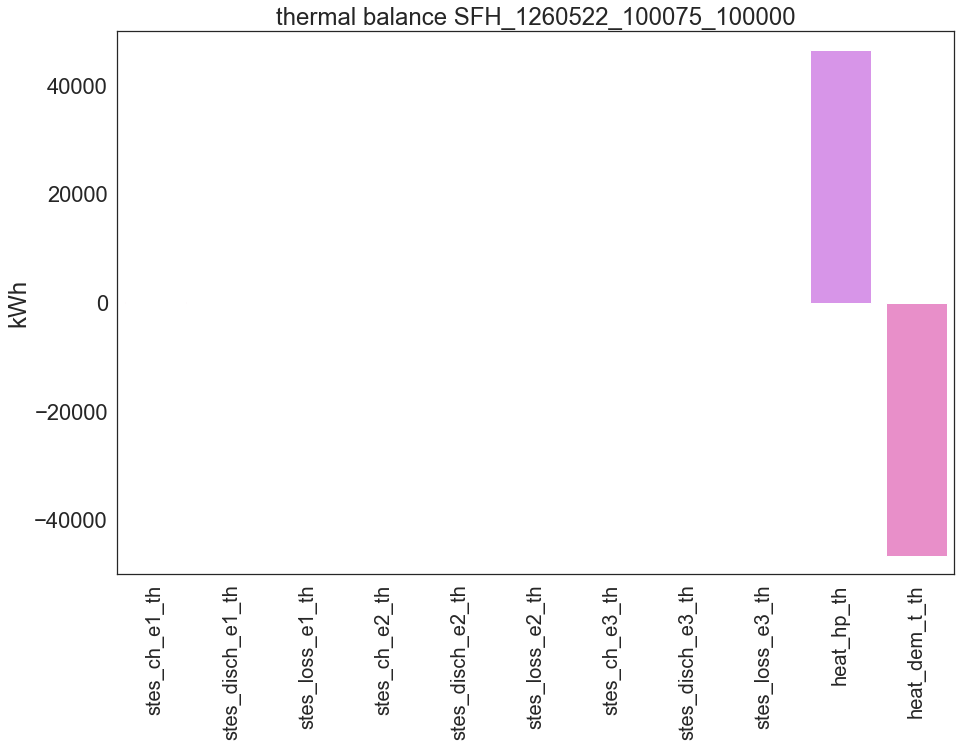

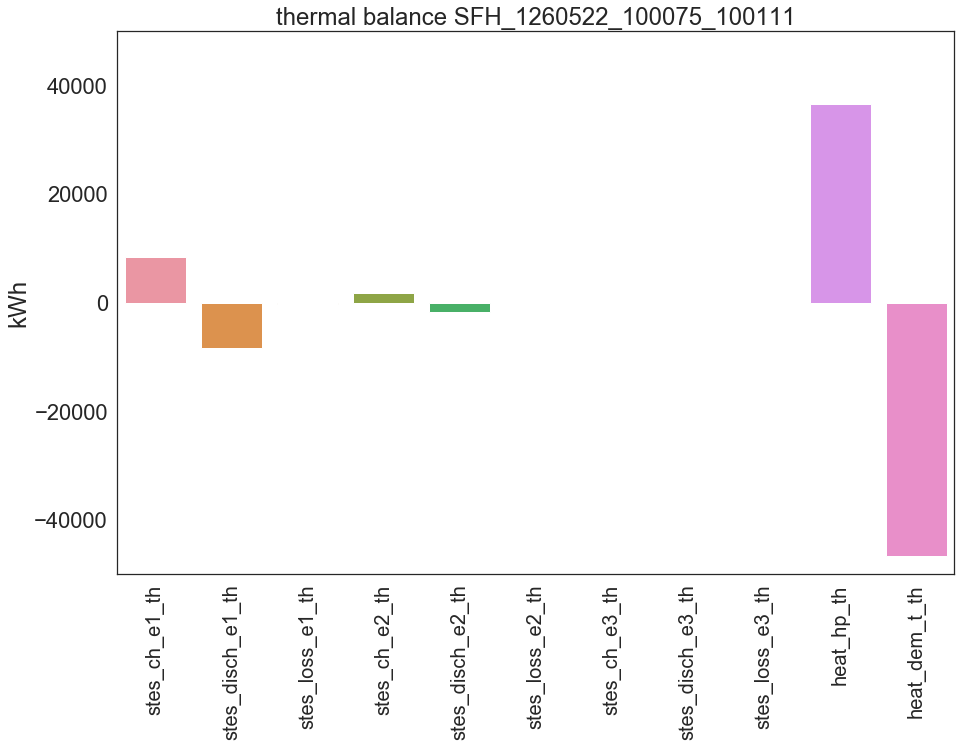

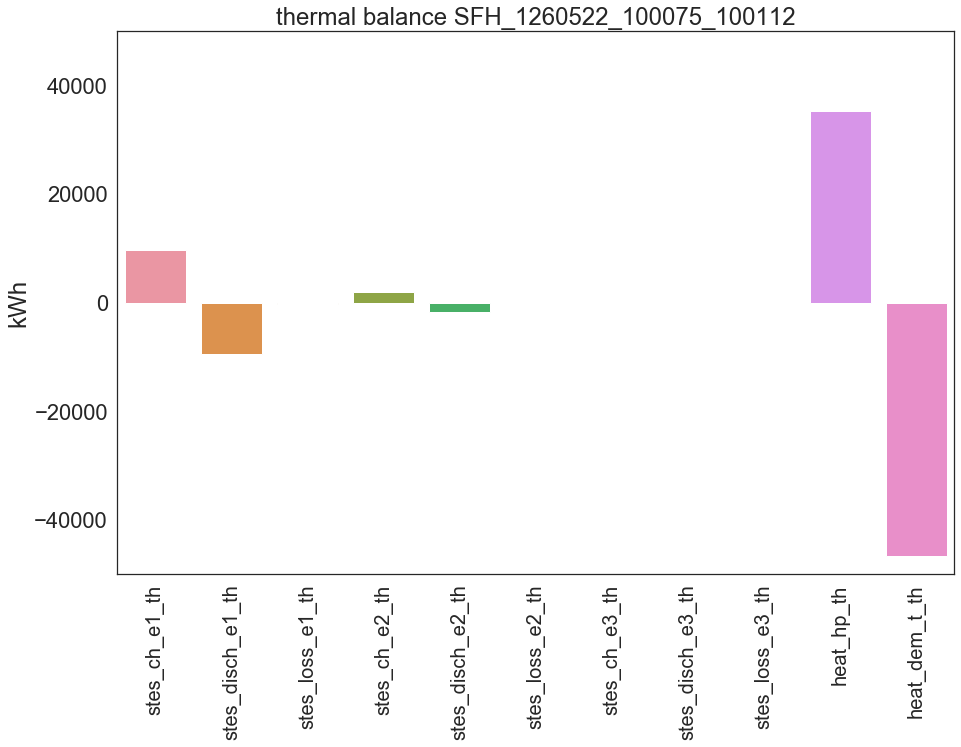

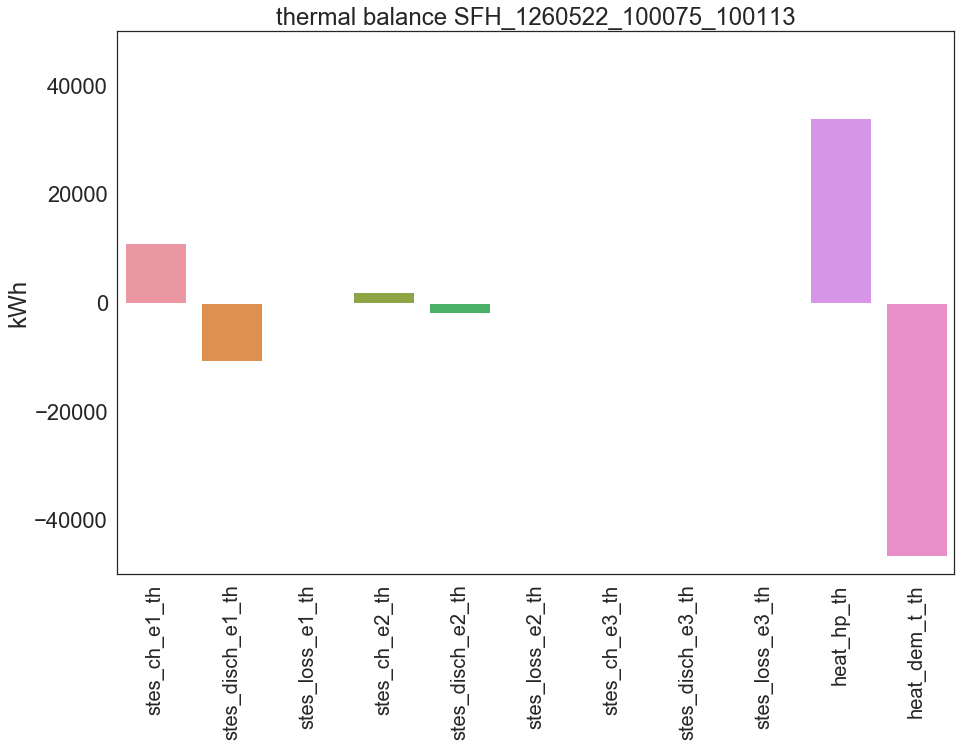

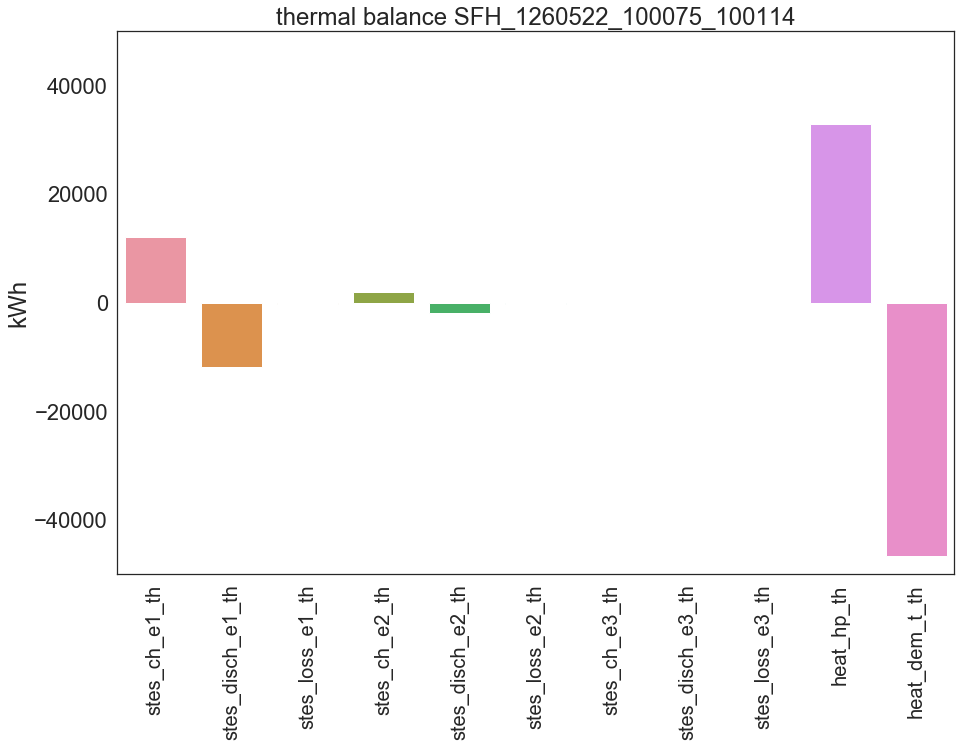

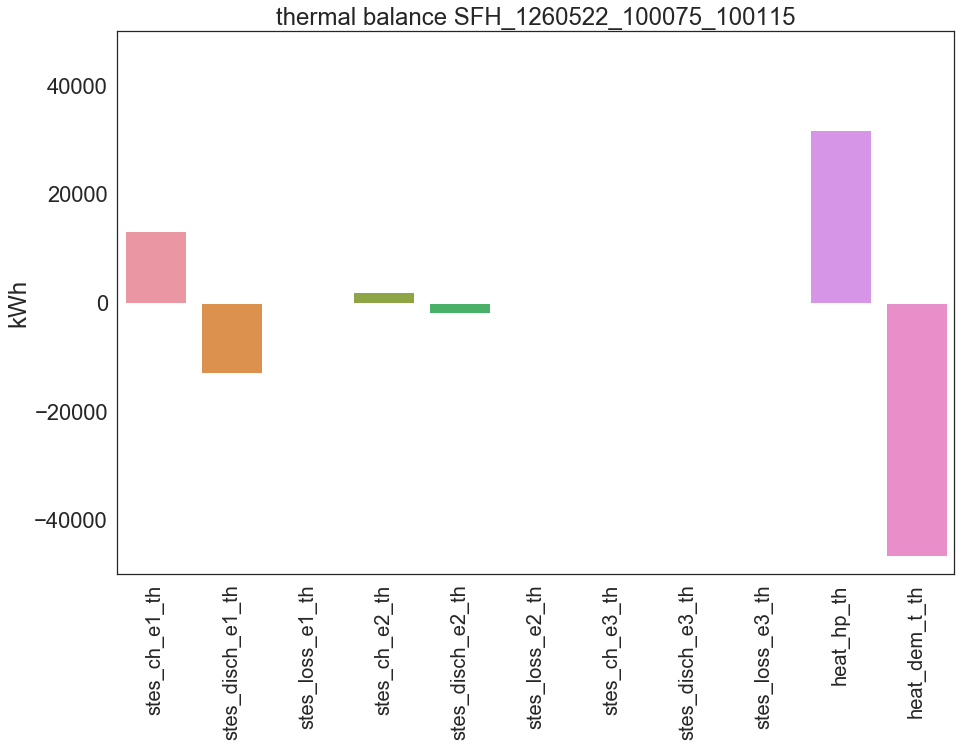

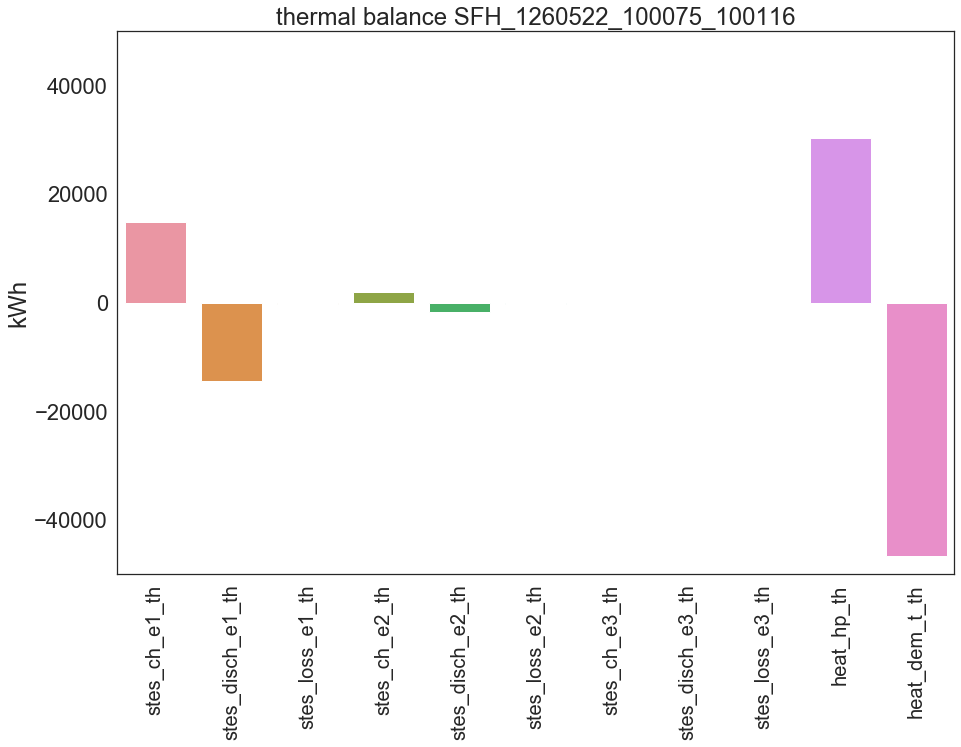

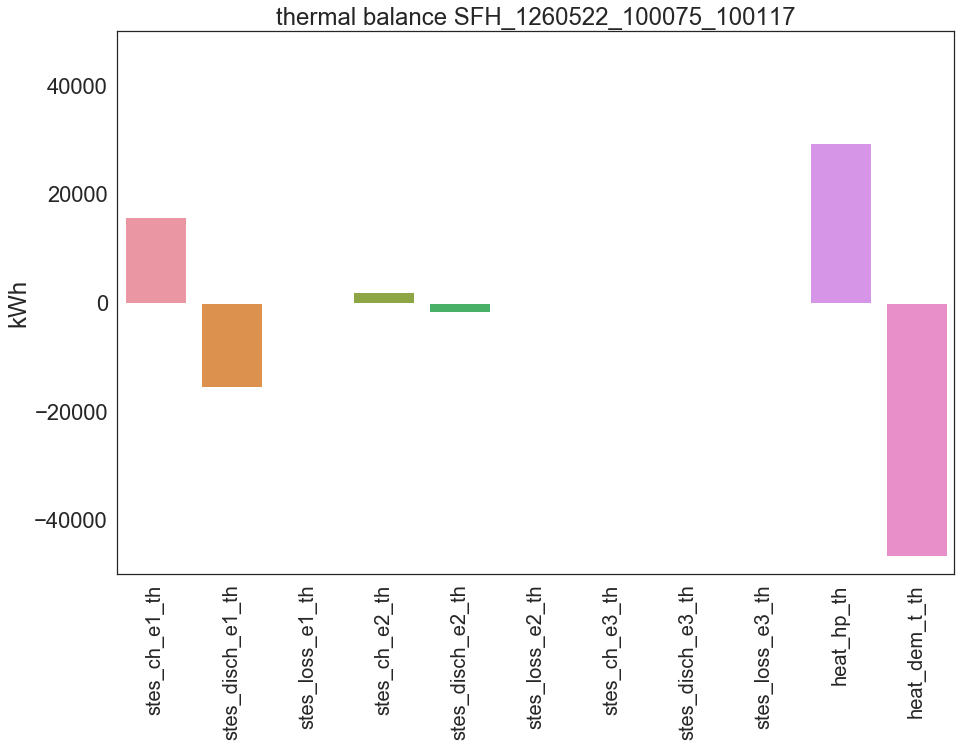

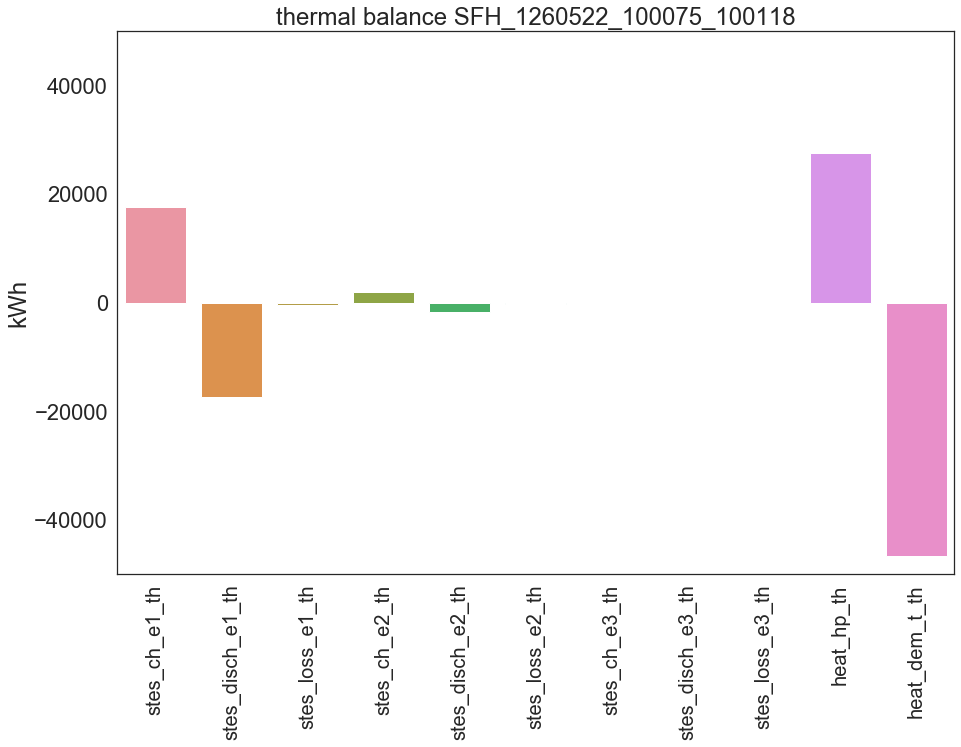

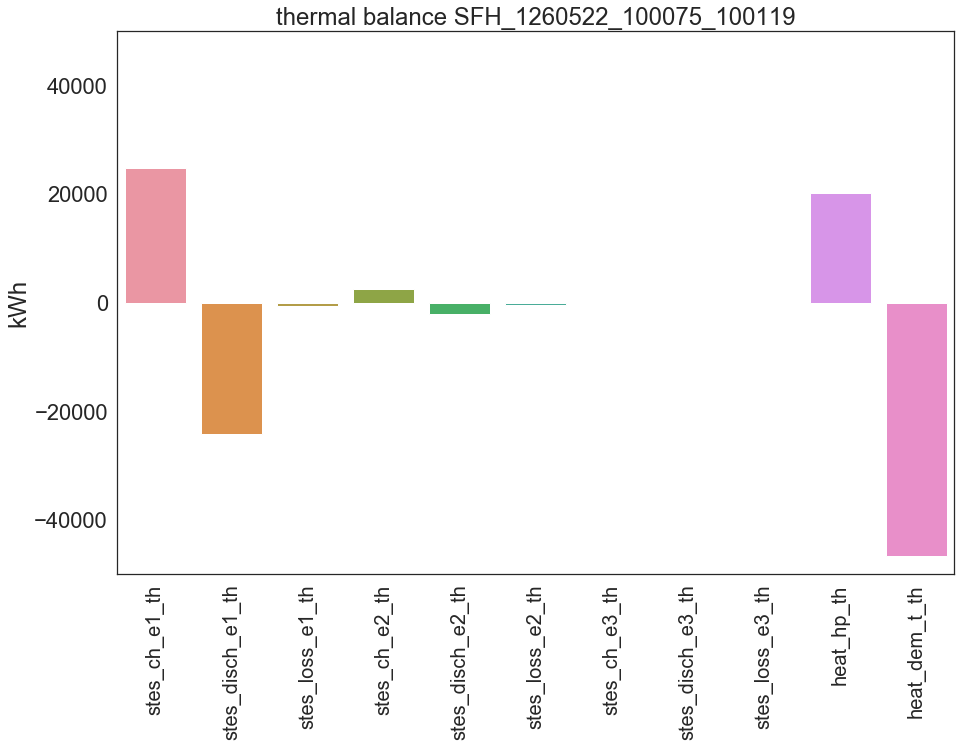

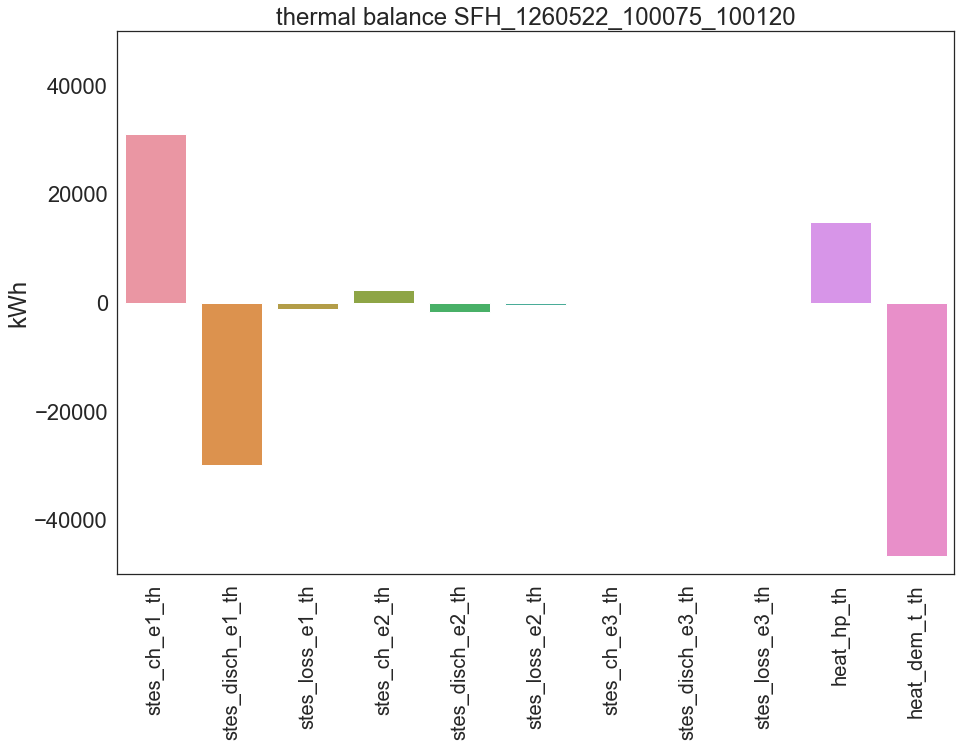

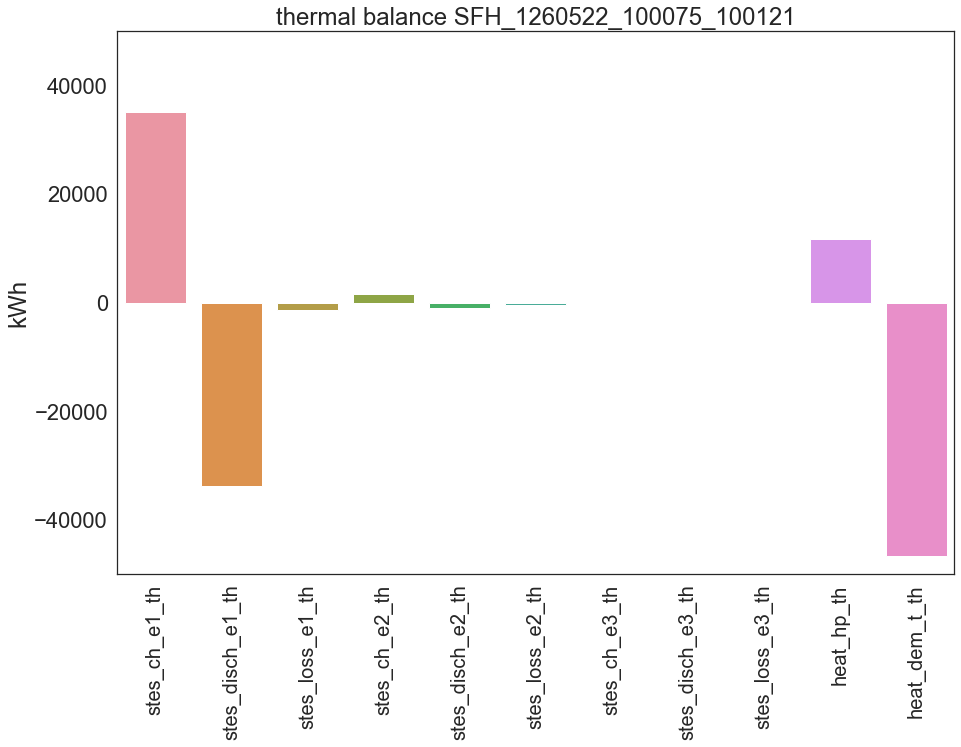

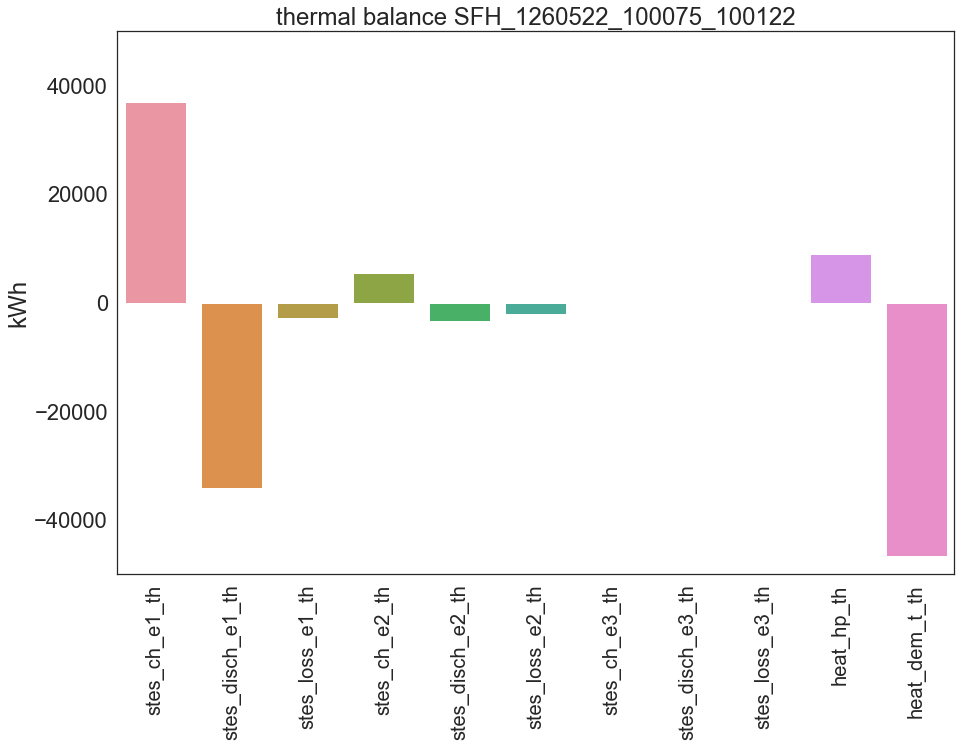

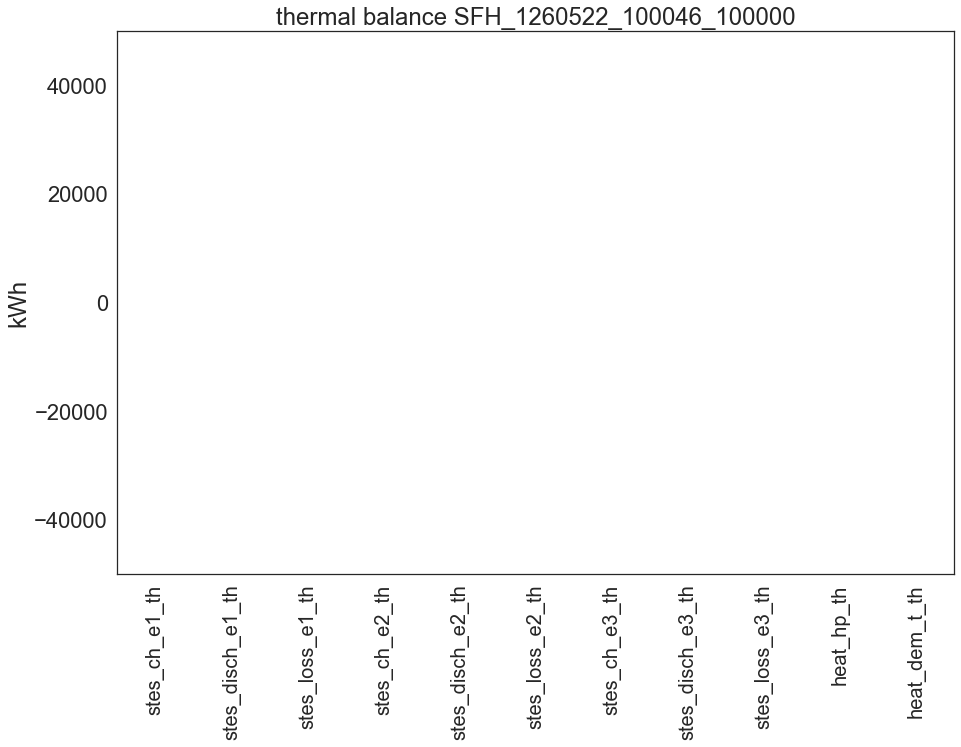

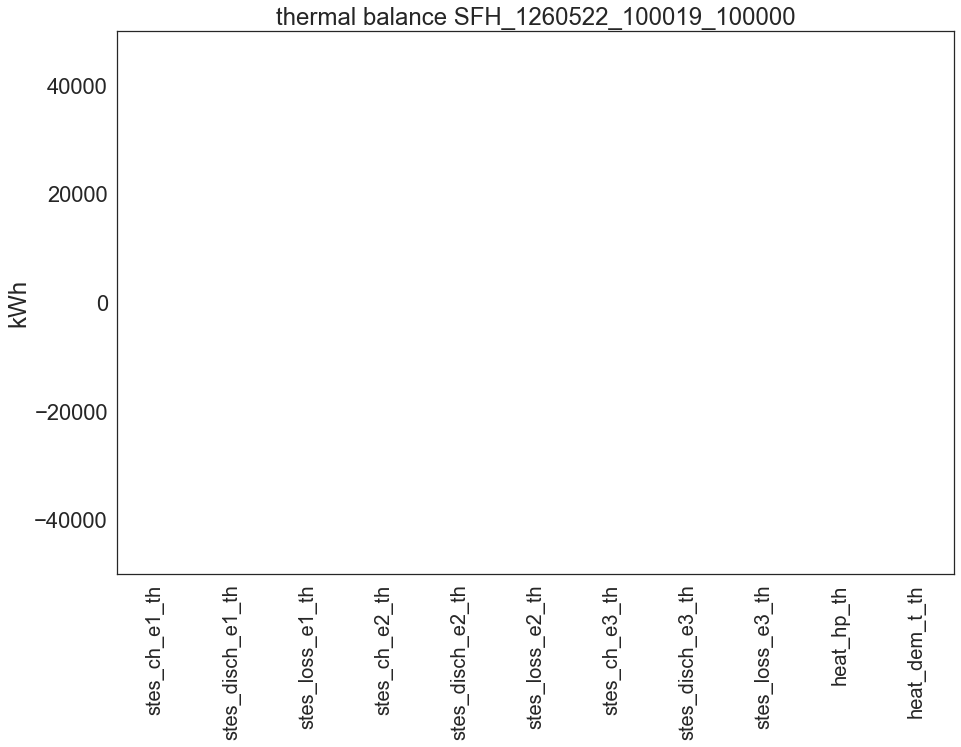

In [24]:
thermal_balance_tot = pd.DataFrame()
gdx_stes_name_list = []
for therm_dem_scen, therm_bal_df in gdx_stes_heat_th_dict.items():
    
    gdx_stes_name_1 = therm_dem_scen[:14]
    gdx_stes_name_2 = therm_dem_scen[-6:]
    gdx_stes_name = gdx_stes_name_1 + '_' + gdx_stes_name_2
    gdx_stes_name_list.append(gdx_stes_name)
        
    therm_year_df = therm_bal_df.copy()
    therm_year_df.loc['Total'] = therm_year_df.sum()
    therm_year_df = therm_year_df.drop(list(range(0,8760)))
    
    therm_year_df['heat_dem_t_th'] = therm_year_df['heat_dem_t_th']*-1
    therm_year_df['heat_hp_th'] = therm_year_df['heat_hp_th']*-1
    
    therm_year_df = therm_year_df[['stes_ch_e1_th','stes_disch_e1_th','stes_loss_e1_th',\
                                'stes_ch_e2_th','stes_disch_e2_th','stes_loss_e2_th',\
                                'stes_ch_e3_th','stes_disch_e3_th','stes_loss_e3_th',\
                                'heat_hp_th','heat_dem_t_th']]
    
    thermal_balance_tot = pd.concat([thermal_balance_tot,therm_year_df],sort = False)
    
    #gdx_report = gdx_dict.get(gdx_scen)
    
    header = 'thermal balance' 
    
    #data_scen_name = data_scen[:-24]
        
    #title = header + ' ' + data_scen_name + '_' + build_typ
        
    title = header + ' ' + build_typ + '_' + gdx_stes_name
    
    #Defining plot style (https://seaborn.pydata.org/tutorial/aesthetics.html)
    sns.set(rc={'figure.figsize':(15,10)}, palette = 'muted', style = 'white')
    #Defining axes and title font size
    sns.set_context("notebook", font_scale = 2)

    #Plotting
    plt.figure() #New plot on each loop
    therm_sum_plot = sns.barplot(data = therm_year_df).set_title(title)
    #grid_bal_plot.tick_params(labelsize = 5)
    #sns.barplot(x = 'Total', y = '', hue = 'total energy', data = grid_bal_df).set_title(title)
    #sns.barplot(x="day", y="total_bill", data=tips)
    #Legend configuration (loc and bbox_to_anchor work together to locate the legend) 
    #plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'small')
    #Rotates the x axis labels in case they overlap
    axes = plt.gca()
    axes.set_ylim([-50000,50000])
    plt.xticks(rotation = 90,fontsize = 20)
    plt.xlabel("")
    plt.ylabel("kWh")
    print(therm_year_df)


thermal_balance_tot['scen'] = gdx_stes_name_list    
thermal_balance_tot

In [ ]:
for therm_dem_scen, therm_bal_df in gdx_stes_heat_th_dict.items():
    
    gdx_stes_name_1 = therm_dem_scen[:14]
    gdx_stes_name_2 = therm_dem_scen[-6:]
    gdx_stes_name = gdx_stes_name_1 + '_' + gdx_stes_name_2
    
    therm_year_df = therm_bal_df.copy()
    therm_year_df.loc['Total'] = therm_year_df.sum()
    therm_year_df = therm_year_df.drop(list(range(0,8760)))
    
    therm_year_df['heat_dem_t_th'] = therm_year_df['heat_dem_t_th']*-1
    therm_year_df['heat_hp_th'] = therm_year_df['heat_hp_th']*-1
    
    therm_year_df = therm_year_df[['stes_ch_e1_th','stes_disch_e1_th','stes_loss_e1_th',\
                                'stes_ch_e2_th','stes_disch_e2_th','stes_loss_e2_th',\
                                'stes_ch_e3_th','stes_disch_e3_th','stes_loss_e3_th',\
                                'heat_hp_th','heat_dem_t_th']]

    arr = np.arange(len(grid_bal_df)) // 24
    therm_day_df = therm_bal_df.groupby(arr).sum()
    therm_day_df = therm_day_df.drop(columns = ['heat_dem_t_th'])
    therm_day_df = therm_day_df[['heat_hp_th',\
                              'stes_ch_e1_th','stes_disch_e1_th','stes_loss_e1_th',\
                              'stes_ch_e2_th','stes_disch_e2_th','stes_loss_e2_th',\
                              'stes_ch_e3_th','stes_disch_e3_th','stes_loss_e3_th']]
    

    #therm_day_df['heat_hp_th'] = therm_day_df['heat_hp_th']*-1                                

    
    #print(therm_day_df)

    header = 'thermal demand' 
    
    #data_scen_name = data_scen[:-24]
        
    #title = header + ' ' + data_scen_name + '_' + build_typ
        
    title = header + ' ' + build_typ + '_' +  gdx_stes_name
        
    #Defining plot style (https://seaborn.pydata.org/tutorial/aesthetics.html)
    sns.set(rc={'figure.figsize':(60,40)}, palette = 'muted', style = 'white')
    #Defining axes and title font size
    sns.set_context("notebook", font_scale = 8)
        
    #Plotting
    plt.figure() #New plot on each loop
        
    year_dem_plot = therm_day_df.transpose().T.plot(kind='bar', stacked=True).set_title(title)
    
    #sns.lineplot(data = grid_plot_df, legend = 'brief',dashes = False).set_title(title)

    #Legend configuration (loc and bbox_to_anchor work together to locate the legend) 
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'small')
    axes = plt.gca()
    axes.set_ylim([-125,375])
    #Rotates the x axis labels in case they overlap
    plt.xticks(rotation=0)
    plt.xticks(np.arange(0,364,step=60),('0','60','120','180','240','300','360'))
    plt.xlabel("day")
    plt.ylabel("kWh")

In [ ]:
for therm_dem_scen, therm_bal_df in gdx_stes_heat_th_dict.items():
    
    gdx_stes_name_1 = therm_dem_scen[:14]
    gdx_stes_name_2 = therm_dem_scen[-6:]
    gdx_stes_name = gdx_stes_name_1 + '_' + gdx_stes_name_2
    
    therm_year_df = therm_bal_df.copy()
    therm_year_df.loc['Total'] = therm_year_df.sum()
    therm_year_df = therm_year_df.drop(list(range(0,8760)))
    
    therm_year_df['heat_dem_t_th'] = therm_year_df['heat_dem_t_th']*-1
    therm_year_df['heat_hp_th'] = therm_year_df['heat_hp_th']*-1
    
    therm_year_df = therm_year_df[['stes_ch_e1_th','stes_disch_e1_th','stes_loss_e1_th',\
                                'stes_ch_e2_th','stes_disch_e2_th','stes_loss_e2_th',\
                                'stes_ch_e3_th','stes_disch_e3_th','stes_loss_e3_th',\
                                'heat_hp_th','heat_dem_t_th']]

    arr = np.arange(len(grid_bal_df)) // 24
    therm_day_df = therm_bal_df.groupby(arr).sum()
    therm_day_df = therm_day_df.drop(columns = ['heat_dem_t_th'])
    therm_day_df = therm_day_df[['heat_hp_th',\
                              'stes_ch_e1_th','stes_disch_e1_th','stes_loss_e1_th',\
                              'stes_ch_e2_th','stes_disch_e2_th','stes_loss_e2_th',\
                              'stes_ch_e3_th','stes_disch_e3_th','stes_loss_e3_th']]

    therm_day_df['stes_ch'] = therm_day_df['stes_ch_e1_th']+therm_day_df['stes_ch_e2_th']+therm_day_df['stes_ch_e3_th']
    therm_day_df['stes_disch'] = therm_day_df['stes_disch_e1_th']+therm_day_df['stes_disch_e2_th']+therm_day_df['stes_disch_e3_th']
    therm_day_df['stes_loss'] = therm_day_df['stes_loss_e1_th']+therm_day_df['stes_loss_e2_th']+therm_day_df['stes_loss_e3_th']
    therm_day_df = therm_day_df.drop(columns = ['stes_ch_e1_th','stes_disch_e1_th','stes_loss_e1_th',\
                              'stes_ch_e2_th','stes_disch_e2_th','stes_loss_e2_th',\
                              'stes_ch_e3_th','stes_disch_e3_th','stes_loss_e3_th'])


    header = 'thermal demand' 
    
    #data_scen_name = data_scen[:-24]
        
    #title = header + ' ' + data_scen_name + '_' + build_typ
        
    title = header +' ' + build_typ + '_' + gdx_stes_name
        
    #Defining plot style (https://seaborn.pydata.org/tutorial/aesthetics.html)
    sns.set(rc={'figure.figsize':(60,40)}, palette = 'muted', style = 'white')
    #Defining axes and title font size
    sns.set_context("notebook", font_scale = 8)
        
    #Plotting
    plt.figure() #New plot on each loop
        
    year_dem_plot = therm_day_df.transpose().T.plot(kind='bar', stacked=True).set_title(title)
    
    #sns.lineplot(data = grid_plot_df, legend = 'brief',dashes = False).set_title(title)

    #Legend configuration (loc and bbox_to_anchor work together to locate the legend) 
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'small')
    axes = plt.gca()
    axes.set_ylim([-125,375])
    #Rotates the x axis labels in case they overlap
    plt.xticks(rotation=0)
    plt.xticks(np.arange(0,364,step=60),('0','60','120','180','240','300','360'))
    plt.xlabel("day")
    plt.ylabel("kWh")

In [ ]:
# for grid_dem_scen, grid_bal_df in gdx_stes_grid_dict.items():
    
#      #'bat_ch'  'bat_disch'  'pv_sup'  'heat_hp_el'  'stes_ch_tot_hp_el'  'stes_ch_e3_el'
    
#     #'dhw_cen_dem_el'  'elec_dem'  'dhw_ch_el'  'grid_dem_tot'
    
#     #grid_week_df = grid_bal_df.copy().drop(columns = ['bat_ch','bat_disch','pv_sup','dhw_cen_dem_el','grid_dem_tot'])
#     grid_plot_df = grid_bal_df.copy().drop(columns = ['bat_ch','bat_disch','dhw_cen_dem_el','grid_dem_tot'])
    
#     grid_plot_df = grid_plot_df[['elec_dem','pv_sup','dhw_ch_el','heat_hp_el','stes_ch_tot_hp_el','stes_ch_e3_el']]
    
#     header = 'grid demand' 
    
#     data_scen_name = data_scen[:-24]
        
#     title = header + ' ' + data_scen_name + '_' + build_typ
        
#     #Defining plot style (https://seaborn.pydata.org/tutorial/aesthetics.html)
#     sns.set(rc={'figure.figsize':(15,10)}, palette = 'muted', style = 'white')
#     #Defining axes and title font size
#     sns.set_context("notebook", font_scale = 2)
        
#     #Plotting
#     #plt.figure() #New plot on each loop
        
#     year_dem_plot = grid_plot_df.transpose().T.plot(kind='bar', stacked=True).set_title(title)
    
#     sns.lineplot(data = grid_plot_df, legend = 'brief',dashes = False).set_title(title)

#     #Legend configuration (loc and bbox_to_anchor work together to locate the legend) 
#     plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'small')
#     #Rotates the x axis labels in case they overlap
#     plt.xticks(rotation=60)
#     plt.xlabel("hours")
#     plt.ylabel("kWh")
           

In [ ]:
weeks_list = [8,10,35,49]

for grid_dem_scen, grid_bal_df in gdx_stes_grid_dict.items():
    
     #'bat_ch'  'bat_disch'  'pv_sup'  'heat_hp_el'  'stes_ch_tot_hp_el'  'stes_ch_e3_el'
    
    #'dhw_cen_dem_el'  'elec_dem'  'dhw_ch_el'  'grid_dem_tot'
    
    #grid_week_df = grid_bal_df.copy().drop(columns = ['bat_ch','bat_disch','pv_sup','dhw_cen_dem_el','grid_dem_tot'])
    grid_week_df = grid_bal_df.copy().drop(columns = ['bat_ch','bat_disch','dhw_cen_dem_el','grid_dem_tot'])
    
    grid_week_df = grid_week_df[['elec_dem','pv_sup','dhw_ch_el','heat_hp_el','stes_ch_tot_hp_el','stes_ch_e3_el']]
    
    for week in weeks_list:
        
        day_end = week*168
        day_init = day_end - 48
        
        week_df = grid_week_df.loc[day_init:day_end]
        hours_tot = day_end - day_init
        
        header = 'grid demand week' 
        
        title = header + ' ' + str(week)
        
        #Defining plot style (https://seaborn.pydata.org/tutorial/aesthetics.html)
        sns.set(rc={'figure.figsize':(15,10)}, palette = 'muted', style = 'white')
        #Defining axes and title font size
        sns.set_context("notebook", font_scale = 2)
        
        #Plotting
        plt.figure() #New plot on each loop
        
        week_plot = week_df.transpose().T.plot(kind='bar', stacked=True).set_title(title)

        #Legend configuration (loc and bbox_to_anchor work together to locate the legend) 
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'small')
        #Rotates the x axis labels in case they overlap
        plt.xticks(rotation=0)
        plt.xticks(np.arange(0,hours_tot,step = 5))
        plt.xlabel("hours")
        plt.ylabel("kWh")
        
        
        

In [ ]:
#gdx_stes_heat_th_dict =  {}
#gdx_stes_heat_th_dict = gdx_report(report_name ='report_heat_th',gdx_path = gdx_stes_path,scen_graph_list = scen_graph_list)

In [ ]:
weeks_list = [1,8,10,35,36,49]

for heat_dem_scen, heat_bal_df in gdx_stes_heat_th_dict.items():
    
     #'stes_ch_e1_th','stes_disch_e1_th','stes_ch_e2_th','stes_disch_e2_th','stes_ch_e3_th',\
    #'stes_disch_e3_th','heat_hp_th'
    
    
    heat_week_df = heat_bal_df.copy()
    
    heat_week_df = heat_bal_df.copy()
    
    heat_week_df = heat_week_df[['heat_hp_th','stes_ch_e1_th','stes_disch_e1_th','stes_ch_e2_th',\
                                  'stes_disch_e2_th','stes_ch_e3_th','stes_disch_e3_th']]
    
    for week in weeks_list:
        
        day_end = week*168
        day_init = day_end - 48
        
        week_df = heat_week_df.loc[day_init:day_end]
        hours_tot = day_end - day_init
        
        header = 'Heat&Loss heat balance week' 
        
        title = header + ' ' + str(week) + ' ' + 'daily COP'
        
        #Defining plot style (https://seaborn.pydata.org/tutorial/aesthetics.html)
        sns.set(rc={'figure.figsize':(15,10)}, palette = 'muted', style = 'white')
        #Defining axes and title font size
        sns.set_context("notebook", font_scale = 2)
        
        #Plotting
        plt.figure() #New plot on each loop
        
        week_plot = week_df.transpose().T.plot(kind='bar', stacked=True).set_title(title)

        #Legend configuration (loc and bbox_to_anchor work together to locate the legend) 
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'small')
        axes = plt.gca()
        axes.set_ylim([-40,30])
        #Rotates the x axis labels in case they overlap
        plt.xticks(rotation=90)
        #plt.xticks(np.arange(0,hours_tot,step = 5))
        plt.xlabel("hours")
        plt.ylabel("kWh")
        